<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-problem" data-toc-modified-id="The-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The problem</a></span></li><li><span><a href="#Data-exporation" data-toc-modified-id="Data-exporation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exporation</a></span></li><li><span><a href="#The-linear-model" data-toc-modified-id="The-linear-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The linear model</a></span><ul class="toc-item"><li><span><a href="#Understanding-the-model-error-as-a-function-of-parameters-m-and-n" data-toc-modified-id="Understanding-the-model-error-as-a-function-of-parameters-m-and-n-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Understanding the model error as a function of parameters <code>m</code> and <code>n</code></a></span></li></ul></li><li><span><a href="#The-optimal-linear-model" data-toc-modified-id="The-optimal-linear-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The optimal linear model</a></span><ul class="toc-item"><li><span><a href="#Understanding-lr-attributes-/-methods" data-toc-modified-id="Understanding-lr-attributes-/-methods-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Understanding lr attributes / methods</a></span></li></ul></li><li><span><a href="#Align-with-business-to-decide-the-optimal-metric!!" data-toc-modified-id="Align-with-business-to-decide-the-optimal-metric!!-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Align with business to decide the optimal metric!!</a></span></li></ul></div>

# Linear regression motivation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## The problem

In [6]:
data = pd.read_csv("../datasets/hours_vs_mark.csv", index_col=0)

We have 100 students, and we know:
 * how many hours they studied for their exam
 * what mark they got (0 to 100)

In [9]:
data.head()

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


In [8]:
data.sample(5)

,hours,mark
96,49,21
6,367,26
31,60,19
0,865,95
15,980,90


In [13]:
data.corr()

,hours,mark
hours,1.000000,0.867072
mark,0.867072,1.000000


We would like to understand the relationship $$mark = f(hours)$$

So that we can **predict the expected mark** we will get by studying a given number of hours

## Data exporation

<AxesSubplot:xlabel='hours', ylabel='Count'>

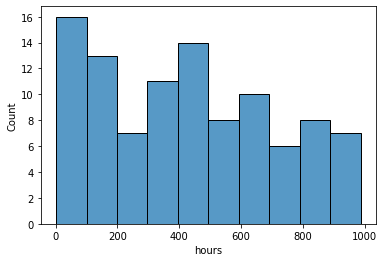

In [17]:
sns.histplot(data.hours, bins=10)

<AxesSubplot:xlabel='mark', ylabel='Count'>

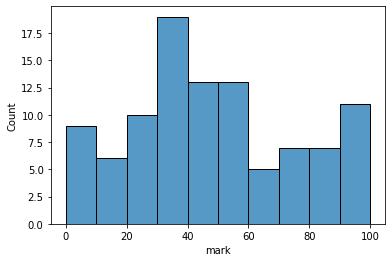

In [19]:
sns.histplot(data.mark, bins=10)

<AxesSubplot:xlabel='hours', ylabel='mark'>

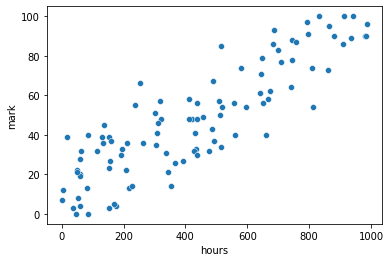

In [21]:
sns.scatterplot(x=data["hours"], y=data["mark"])

## The linear model

Lets try a linear regression $$Y = m * X + n$$

$m$ is the slope  
$n$ is the value of $Y$ when $X=0$ 

$$mark = m * hours + n$$

We want to find $m$ and $n$ that *best* model our data

Lets guess:

In [24]:
data.head()

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


$$mark =0.1*hours +10$$

$$mark_2 =0.09*hours + 15$$

Which model performs better?

In [27]:
data.shape

(100, 2)

In [28]:
data["prediction_1"] = 0.1 * data.hours + 10

In [29]:
data["prediction_2"] = 0.09 * data.hours + 15

In [31]:
# semi-random prediction
data["prediction_3"] = np.random.uniform(40, 60, size=data.shape[0]).round(2)

In [32]:
data.head(10)

,hours,mark,prediction_1,prediction_2,prediction_3
0,865,95,96.5,92.85,56.07
1,4,12,10.4,15.36,46.63
2,305,35,40.5,42.45,59.45
3,437,56,53.7,54.33,53.24
4,682,86,78.2,76.38,54.13
5,560,40,66.0,65.40,58.86
6,367,26,46.7,48.03,51.63
7,861,73,96.1,92.49,49.93
8,59,20,15.9,20.31,55.80
9,514,85,61.4,61.26,53.92


Lets measure error of the three models

Lets compute **Mean squared error**, which:
 - Turns every deviation positive (square power)
 - Penalizes specially big deviations (deviation of 3 is 9 times worse than deviation of 1)

In [33]:
data['error_1'] = (data.mark - data.prediction_1) ** 2

In [34]:
data['error_2'] = (data.mark - data.prediction_2)  ** 2

In [35]:
data['error_3'] = (data.mark - data.prediction_3) ** 2

In [36]:
data.head(10)

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,96.5,92.85,56.07,2.25,4.6225,1515.5449
1,4,12,10.4,15.36,46.63,2.56,11.2896,1199.2369
2,305,35,40.5,42.45,59.45,30.25,55.5025,597.8025
3,437,56,53.7,54.33,53.24,5.29,2.7889,7.6176
4,682,86,78.2,76.38,54.13,60.84,92.5444,1015.6969
5,560,40,66.0,65.40,58.86,676.00,645.1600,355.6996
6,367,26,46.7,48.03,51.63,428.49,485.3209,656.8969
7,861,73,96.1,92.49,49.93,533.61,379.8601,532.2249
8,59,20,15.9,20.31,55.80,16.81,0.0961,1281.6400
9,514,85,61.4,61.26,53.92,556.96,563.5876,965.9664


In [42]:
data.error_1.mean()

233.1216

In [43]:
data.error_2.mean()

223.54325599999996

In [39]:
data.error_3.mean()

811.6272890000001

Considering Mean Squared Error criteria, model 2 performs better!

Lets for a moment consider another criteria:   If pred and real distance is less than 5, good. Otherwise, bad

In [58]:
data["error_1_bis"] = (data.mark - data.prediction_1).abs() < 5

In [59]:
data["error_2_bis"] = (data.mark - data.prediction_2).abs() < 5

In [60]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,error_1_bis,error_2_bis
0,865,95,96.5,92.85,56.07,2.25,4.6225,1515.5449,True,True
1,4,12,10.4,15.36,46.63,2.56,11.2896,1199.2369,True,True
2,305,35,40.5,42.45,59.45,30.25,55.5025,597.8025,False,False
3,437,56,53.7,54.33,53.24,5.29,2.7889,7.6176,True,True
4,682,86,78.2,76.38,54.13,60.84,92.5444,1015.6969,False,False


In [61]:
data.error_1_bis.sum()

25

In [62]:
data.error_2_bis.sum()

26

This alternative metric would choose also model 2

Lets plot our models

$$mark =0.1*hours +10$$

$$mark_2 =0.09*hours + 15$$

<IPython.core.display.Javascript object>


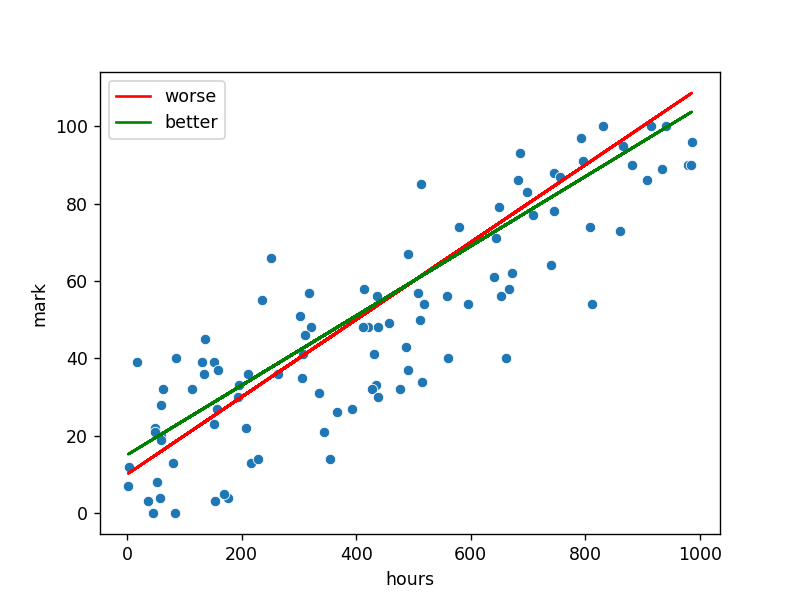

In [65]:
fig, ax = plt.subplots()
sns.scatterplot(x=data["hours"], y=data["mark"])

plt.plot(data.hours, data.prediction_1, color='r', label='worse')
plt.plot(data.hours, data.prediction_2, color='g', label='better')

plt.legend()

### Understanding the model error as a function of parameters `m` and `n`

$$mark = m * hours + n$$

`L` stands for loss (word used for "error" in Data Science literature)

$$\text{model_error} = L(m, n)$$

$$mark = 0.1 * hours + 10$$

$$L(0.1, 10) = 233$$

$$mark_2 =0.09 * hours + 15$$

$$L(0.09, 15) =223$$

`L` being a function of 2 variables, it may have a global minimum.  

If we call:
 - $y_i$ real value of student $i$
 - $\hat{y_i}$ predicted value of student $i$  

The loss is $$L(m, n) = \frac{1}{N} \sum (y_i - \hat{y_i})^2 = \frac{1}{N} \sum (y_i - (m * x_i + n))^2 $$

And being quadratic in `m` and `n`, the function `L` has 1 local (and global) minimum

## The optimal linear model

Can we find the **best**?

`scikit-learn` is a Python library for building ML models

Linear regression is now called a ML algorithm (years ago it was only basic statistical inference... you know, the hype)

In [ ]:
!pip install scikit-learn

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lr = LinearRegression()

In [82]:
lr

LinearRegression()

In [83]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [ ]:
data.head()

In [84]:
# train the model
# X predictors: 1 or more columns
# y target: 1 column
lr.fit(
    # X = data[["hours", "age", "n_hours_sleep"]],
    X = data[["hours"]],
    y = data.mark,
)

LinearRegression()

$$mark = m * hours + n$$

In [85]:
# access coefficient(s) m: it has 1 entry per predictor variable
lr.coef_

array([0.08437787])

Possible linear model with 3 predictors:
$$mark = m_1 * hours + m_2 * age + m_3 * \text{n_hours_sleep} + n$$

In [86]:
optimal_m = lr.coef_[0]

In [87]:
optimal_m

0.08437787096170372

In [88]:
optimal_n = lr.intercept_

In [89]:
optimal_n

11.78070717807148

$$mark = 0.0844*hours + 11.78$$

In [90]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,error_1_bis,error_2_bis
0,865,95,96.5,92.85,56.07,2.25,4.6225,1515.5449,True,True
1,4,12,10.4,15.36,46.63,2.56,11.2896,1199.2369,True,True
2,305,35,40.5,42.45,59.45,30.25,55.5025,597.8025,False,False
3,437,56,53.7,54.33,53.24,5.29,2.7889,7.6176,True,True
4,682,86,78.2,76.38,54.13,60.84,92.5444,1015.6969,False,False


In [91]:
data["best_prediction"] = (data.hours * optimal_m + optimal_n).round(2)

In [92]:
data["best_prediction_error"] = (data.best_prediction - data.mark) ** 2

In [93]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,error_1_bis,error_2_bis,best_prediction,best_prediction_error
0,865,95,96.5,92.85,56.07,2.25,4.6225,1515.5449,True,True,84.77,104.6529
1,4,12,10.4,15.36,46.63,2.56,11.2896,1199.2369,True,True,12.12,0.0144
2,305,35,40.5,42.45,59.45,30.25,55.5025,597.8025,False,False,37.52,6.3504
3,437,56,53.7,54.33,53.24,5.29,2.7889,7.6176,True,True,48.65,54.0225
4,682,86,78.2,76.38,54.13,60.84,92.5444,1015.6969,False,False,69.33,277.8889


In [94]:
data.best_prediction_error.mean()

189.308348

In [134]:
%matplotlib inline

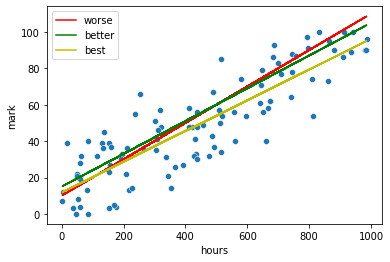

In [135]:
fig, ax = plt.subplots()
sns.scatterplot(x=data["hours"], y=data["mark"])

plt.plot(data.hours, data.prediction_1, color='r', label='worse')
plt.plot(data.hours, data.prediction_2, color='g', label='better')
plt.plot(data.hours, data.best_prediction, color='y', label='best')

plt.legend()

If we wanted to check if the model is better according to our second criteria, we just compute:

In [98]:
data["error_best_bis"] = (data.mark - data.best_prediction).abs() < 5

In [99]:
data.error_best_bis.sum()

28

### Understanding lr attributes / methods

In [101]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,error_1_bis,error_2_bis,best_prediction,best_prediction_error,error_best_bis
0,865,95,96.5,92.85,56.07,2.25,4.6225,1515.5449,True,True,84.77,104.6529,False
1,4,12,10.4,15.36,46.63,2.56,11.2896,1199.2369,True,True,12.12,0.0144,True
2,305,35,40.5,42.45,59.45,30.25,55.5025,597.8025,False,False,37.52,6.3504,True
3,437,56,53.7,54.33,53.24,5.29,2.7889,7.6176,True,True,48.65,54.0225,False
4,682,86,78.2,76.38,54.13,60.84,92.5444,1015.6969,False,False,69.33,277.8889,False


In [104]:
# lets predict for 2 students
lr.predict(np.array([[450], [330]])).round(1)

array([49.8, 39.6])

In [106]:
# lets predict for whole training dataset
lr.predict(data[["hours"]]).round(2)

array([84.77, 12.12, 37.52, 48.65, 69.33, 59.03, 42.75, 84.43, 16.76,
       55.15, 34.06, 74.3 , 58.86, 23.26, 88.4 , 94.47, 86.2 , 80.04,
       24.61, 81.9 , 94.98, 52.87, 88.9 , 78.95, 16.84, 50.43, 24.61,
       28.32, 29.25, 48.4 , 15.58, 16.84, 13.3 , 60.64, 21.32, 55.49,
       47.3 , 18.95, 80.21, 29.58, 65.78, 47.89, 18.62, 62.07, 68.06,
       37.26, 22.83, 16.67, 71.52, 53.13, 37.68, 26.63, 67.55, 30.09,
       26.12, 24.69, 54.98, 28.07, 74.64, 40.13, 51.94, 74.73, 46.54,
       38.95, 54.64, 48.82, 44.86, 31.69, 68.48, 66.8 , 75.57, 16.25,
       48.74, 41.73, 40.81, 23.09, 66.12, 25.03, 66.54, 70.68, 91.18,
       53.21, 25.2 , 18.87, 94.81, 17.01, 48.15, 38.53, 31.02, 11.95,
       46.63, 14.82, 15.83, 55.24, 69.66, 33.04, 15.92, 78.61, 37.94,
       90.59])

`score` returns the coefficient of determination  
In the case of Linear Regression, it is exactly the correlation squared

In [111]:
data

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,error_1_bis,error_2_bis,best_prediction,best_prediction_error,error_best_bis
0,865,95,96.5,92.85,56.07,2.25,4.6225,1515.5449,True,True,84.77,104.6529,False
1,4,12,10.4,15.36,46.63,2.56,11.2896,1199.2369,True,True,12.12,0.0144,True
2,305,35,40.5,42.45,59.45,30.25,55.5025,597.8025,False,False,37.52,6.3504,True
3,437,56,53.7,54.33,53.24,5.29,2.7889,7.6176,True,True,48.65,54.0225,False
4,682,86,78.2,76.38,54.13,60.84,92.5444,1015.6969,False,False,69.33,277.8889,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,252,66,35.2,37.68,47.79,948.64,802.0224,331.6041,False,False,33.04,1086.3616,False
96,49,21,14.9,19.41,58.98,37.21,2.5281,1442.4804,False,True,15.92,25.8064,False
97,792,97,89.2,86.28,45.74,60.84,114.9184,2627.5876,False,False,78.61,338.1921,False
98,310,46,41.0,42.90,40.72,25.00,9.6100,27.8784,False,True,37.94,64.9636,False


Lets plot reality vs prediction

<AxesSubplot:xlabel='mark', ylabel='best_prediction'>

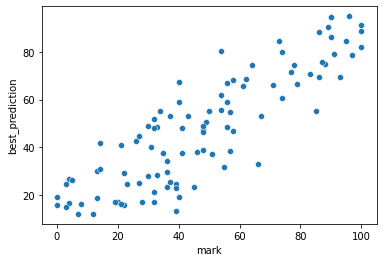

In [110]:
%matplotlib inline
sns.scatterplot(x=data.mark, y=data.best_prediction)

We can evaluate other metrics on our model

In [112]:
from sklearn.metrics import mean_absolute_error

In [113]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,error_1_bis,error_2_bis,best_prediction,best_prediction_error,error_best_bis
0,865,95,96.5,92.85,56.07,2.25,4.6225,1515.5449,True,True,84.77,104.6529,False
1,4,12,10.4,15.36,46.63,2.56,11.2896,1199.2369,True,True,12.12,0.0144,True
2,305,35,40.5,42.45,59.45,30.25,55.5025,597.8025,False,False,37.52,6.3504,True
3,437,56,53.7,54.33,53.24,5.29,2.7889,7.6176,True,True,48.65,54.0225,False
4,682,86,78.2,76.38,54.13,60.84,92.5444,1015.6969,False,False,69.33,277.8889,False


In [114]:
mean_absolute_error(data.mark, data.best_prediction)

11.4026

In [115]:
mean_absolute_error(data.mark, data.prediction_2)

12.200999999999999

## Align with business to decide the optimal metric!!

In [116]:
data2 = pd.DataFrame({"boxes": [100, 150, 160, 90, 220], "pred_1": [105, 153, 172, 93, 244], "pred_2": [98, 146, 166, 88, 214]})

In [118]:
data2

,boxes,pred_1,pred_2
0,100,105,98
1,150,153,146
2,160,172,166
3,90,93,88
4,220,244,214


In [119]:
data2["mse_1"] = (data2["boxes"] - data2["pred_1"]) ** 2
data2["mse_2"] = (data2["boxes"] - data2["pred_2"]) ** 2

In [120]:
data2.head()

,boxes,pred_1,pred_2,mse_1,mse_2
0,100,105,98,25,4
1,150,153,146,9,16
2,160,172,166,144,36
3,90,93,88,9,4
4,220,244,214,576,36


In [121]:
data2.mse_1.mean()

152.6

In [122]:
data2.mse_2.mean()

19.2

Estimate customer lifetime value (CLV)  
20 + 0.96 * 20 + 0.96 **2 * 20 + ...

In [123]:
20 / (1 - 0.96)

499.99999999999955

In [125]:
loss_demand = 3
# suppose we lose 1 of 2 clients if non-provided
loss_offer = 250

In [126]:
data2["loss_demand_1"] = (data2["pred_1"] - data2["boxes"]) * (data2["pred_1"] - data2["boxes"] > 0) * loss_demand

In [127]:
data2["loss_offer_1"] = (- data2["pred_1"] + data2["boxes"]) * (data2["pred_1"] - data2["boxes"] < 0) * loss_offer

In [128]:
data2["loss_demand_2"] = (data2["pred_2"] - data2["boxes"]) * (data2["pred_2"] - data2["boxes"] > 0) * loss_demand

In [129]:
data2["loss_offer_2"] = (- data2["pred_2"] + data2["boxes"]) * (data2["pred_2"] - data2["boxes"] < 0) * loss_offer

In [130]:
data2["loss_1"] = data2.loss_demand_1 + data2.loss_offer_1
data2["loss_2"] = data2.loss_demand_2 + data2.loss_offer_2

In [131]:
data2

,boxes,pred_1,pred_2,mse_1,mse_2,loss_demand_1,loss_offer_1,loss_demand_2,loss_offer_2,loss_1,loss_2
0,100,105,98,25,4,15,0,0,500,15,500
1,150,153,146,9,16,9,0,0,1000,9,1000
2,160,172,166,144,36,36,0,18,0,36,18
3,90,93,88,9,4,9,0,0,500,9,500
4,220,244,214,576,36,72,0,0,1500,72,1500


In [132]:
data2.loss_1.sum()

141

In [133]:
data2.loss_2.sum()

3518